# Before you begin, make sure you close all other COLAB notebooks. 

# Change Runtime settings

## Plesae change your runtime settings to use GPU and high-memory, if you have 

## Runtime --> Change Runtime Type --> GPU wityh high-RAM

In [ ]:
!date # starting time 

Mon Jan 18 02:52:31 UTC 2021


## Install AMPL GPU version. 

```
real	2m59.739s
user	1m48.995s
sys	0m20.614s
```

In [ ]:
%tensorflow_version 1.x

# get the Anaconda file 
! wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
! chmod +x Anaconda3-2019.10-Linux-x86_64.sh
! bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local

! time conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0

import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
import deepchem as dc

# install mordred, bravado and molvs
! time conda install -c conda-forge -y mordred bravado molvs

# get the Install AMPL_GPU_test.sh
!wget https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh

# run the script to install AMPL
! chmod u+x install_AMPL_GPU_test.sh
! ./install_AMPL_GPU_test.sh

--2021-03-04 21:06:30--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94235922 (90M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  89.87M   192MB/s    in 0.5s    

2021-03-04 21:06:31 (192 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [94235922/94235922]

PREFIX=/content/AMPL
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /content/AMPL

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - brotlipy==0.7.0=py38h27cfd23_1003
    - ca-certificates==2020.10.14=0
    - certifi==2020.6.20=pyhd3eb1b0_3
    - cffi==1.14.3=py38h261ae71_2
    - chardet==3.0.4=py38h06a4308_1003
    - conda-package-han

## Exploring target activity data from selected database
## Data source = ExcapeDB
## Target activity = CYP3A4

In [ ]:
# There is a problem with the previously imported cffi, so delete it and 
# load it with AMPL instead
if 'cffi' in sys.modules:
  del sys.modules['cffi']

In [ ]:
# We temporarily disable warnings for demonstration.
# FutureWarnings and DeprecationWarnings are present from some of the AMPL 
# dependency modules.
import warnings
warnings.filterwarnings('ignore')

import json
# import numpy as np
# import pandas as pd
# import os
import requests
import sys

In [ ]:
#
# Import AMPL libraries
# 
import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.diversity_plots as dp
import atomsci.ddm.pipeline.chem_diversity as cd
# Additional python libraries
import pandas as pd
import numpy as np
import getpass, os

ImportError: ignored

# Select a target to work with 
# (e.g. PDE2A, KCNH2, SCNA5)

In [ ]:
target_name='CYP3A4'
# username='ravi'
ofile=target_name+'_excape_curated.csv'

In [ ]:
import io
url = 'https://raw.githubusercontent.com/jm5159/E4511_FNL_2021Spr/master/CYP3A4_excape.tsv'
download = requests.get(url).content

In [ ]:
# Reading the downloaded content and turning it into a pandas dataframe
data = pd.read_csv(io.StringIO(download.decode('utf-8')), sep='\t', header=0 )

# define data locations 
<!-- ## get username to use as a unique identifier to work in shared directories -->

## Load previously saved raw data

In [ ]:
data.head()

,Ambit_InchiKey,Original_Entry_ID,Entrez_ID,Activity_Flag,pXC50,DB,Original_Assay_ID,Tax_ID,Gene_Symbol,Ortholog_Group,SMILES
0,YAYNEUUHHLGGAH-UHFFFAOYNA-N,8192,1576,N,NaN,pubchem,885,9606,CYP3A4,un4,ClCCCCCCCCCCCC
1,LUVCTYHBTXSAMX-UHFFFAOYNA-N,8783,1576,N,NaN,pubchem,885,9606,CYP3A4,un4,ClCCOP(OCCCl)OCCCl
2,FAGUFWYHJQFNRV-UHFFFAOYNA-N,8197,1576,N,NaN,pubchem,885,9606,CYP3A4,un4,N(CCNCCN)CCNCCN
3,HQUQLFOMPYWACS-UHFFFAOYNA-N,8295,1576,N,NaN,pubchem,885,9606,CYP3A4,un4,ClCCOP(OCCCl)(OCCCl)=O
4,JVGPVVUTUMQJKL-UHFFFAOYNA-N,8196,1576,N,NaN,pubchem,885,9606,CYP3A4,un4,S(CCOCCOCCCC)C#N


In [ ]:
data.rename( columns={ "pXC50" : "PXC50", "Ambit_InchiKey" : "compound_id" }, inplace=True)
data.head()

,compound_id,Original_Entry_ID,Entrez_ID,Activity_Flag,PXC50,DB,Original_Assay_ID,Tax_ID,Gene_Symbol,Ortholog_Group,SMILES
0,YAYNEUUHHLGGAH-UHFFFAOYNA-N,8192,1576,N,NaN,pubchem,885,9606,CYP3A4,un4,ClCCCCCCCCCCCC
1,LUVCTYHBTXSAMX-UHFFFAOYNA-N,8783,1576,N,NaN,pubchem,885,9606,CYP3A4,un4,ClCCOP(OCCCl)OCCCl
2,FAGUFWYHJQFNRV-UHFFFAOYNA-N,8197,1576,N,NaN,pubchem,885,9606,CYP3A4,un4,N(CCNCCN)CCNCCN
3,HQUQLFOMPYWACS-UHFFFAOYNA-N,8295,1576,N,NaN,pubchem,885,9606,CYP3A4,un4,ClCCOP(OCCCl)(OCCCl)=O
4,JVGPVVUTUMQJKL-UHFFFAOYNA-N,8196,1576,N,NaN,pubchem,885,9606,CYP3A4,un4,S(CCOCCOCCCC)C#N


In [ ]:
# import os
# working_dir=tmp_dir
curated_file=ofile

In [ ]:
data['SMILES']

0                                           ClCCCCCCCCCCCC
1                                       ClCCOP(OCCCl)OCCCl
2                                          N(CCNCCN)CCNCCN
3                                   ClCCOP(OCCCl)(OCCCl)=O
4                                         S(CCOCCOCCCC)C#N
                               ...                        
19319    O=C(N[C@@H]([C@H]1[C@@](C1)(C(=O)N[C@@H]([C@H]...
19320    O1[C@@]2(O)C[C@@H](O)[C@H]([C@@H]1C[C@H](O[C@H...
19321    O(C1CC=2[C@@]([C@@H]3[C@H]([C@H]4[C@@]([C@@H]5...
19322    O1[C@H]2[C@H](O)[C@@H](O)[C@@H](O[C@H]3[C@H](O...
19323    O[C@H]1[C@@]([C@H]2[C@@]([C@H]3[C@@]([C@]4(C([...
Name: SMILES, Length: 19324, dtype: object

In [ ]:
# Generate SMILES, InChI keys for dataset with curation and structure modules.
# RDkit modules are used to process the SMILES strings
data['rdkit_smiles'] = data['SMILES'].apply(curate_data.base_smiles_from_smiles)
# data['inchi_key'] = data['smiles'].apply(struct_utils.smiles_to_inchi_key)

In [ ]:
print(data.shape)
print(data['rdkit_smiles'].value_counts()[0:10])

(19324, 12)
                                                                                        9
CN1CCN(c2ccc(/C=C/c3n[nH]c4cc(CC5=c6ccccc6=NC5=O)ccc34)cn2)CC1                          2
CC[C@@]1(O)C(=O)OCC2C(=O)n3cc4cc5c(CN(C)C)c(O)ccc5nc4c3C=C21                            2
NCCC(=O)NCCc1cnc[nH]1                                                                   2
C[C@@H]1CC[C@H]2C(=O)O[C@H](CN=[N+]=[N-])CN2[C@@H]1c1ccc(Br)cc1                         2
CCCc1c(OCCCCc2nn[nH]n2)ccc(C(C)=O)c1O                                                   2
O=c1c(O)c(-c2ccc(O)cc2)oc2ccc(O)cc12                                                    2
O=C1C(=O)C(c2ccc(O)c(O)c2)Oc2ccccc21                                                    2
CC[C@]1(O)CC(O[C@@H]2CC(N(C)C)C(O)C(C)O2)c2c(cc3c(c2O)C(=O)c2c(O)cccc2C3=O)C1C(=O)OC    2
CN1[C@H]2CC[C@@H]1CC(OC(=O)c1c[nH]c3ccccc13)C2                                          2
Name: rdkit_smiles, dtype: int64


In [ ]:
# import os
# working_dir=tmp_dir
# ofile=target_name+'_excape_curated.csv.'+username

# column: Response values column
column = 'PXC50'

# tolerance: Percentage of individual respsonse values allowed to different from 
# the average to be included in averaging
tolerance = 10

# list_bad_duplicates: Print structures with bad duplicates
list_bad_duplicates = 'Yes'

# max_std: Maximum allowed standard deviation for computed average response value
# NOTE: In this example, we set this value very high to disable this feature
max_std = 1

# compound_id: Compound ID column
compound_id = 'compound_id'

# smiles_col: SMILES column
smiles_col = 'rdkit_smiles'

# column that will be averaged ; smiles_col; used to find the replicates
# 

curated_df = curate_data.average_and_remove_duplicates(column, tolerance, 
                                                       list_bad_duplicates, 
                                                       data, max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)
# curated_file = os.path.join(working_dir, ofile)
## discard out of range values
curated_df=curated_df[curated_df['VALUE_NUM_mean']>2]
curated_df.to_csv(curated_file, index=False)

Bad duplicates removed from dataset
Dataframe size (19315, 16)
List of 'bad' duplicates removed
                       compound_id    PXC50  ...  Perc_Var  VALUE_NUM_std
7753   MXZASAPEQAUAEP-REUGXJQINA-N      NaN  ...       NaN       1.060667
7754   MXZASAPEQAUAEP-VADGTKANNA-N      NaN  ...       NaN       1.060667
1383   NVYHVHVSHFOAPB-UHFFFAOYNA-N      NaN  ...       NaN       1.060667
1490   QGTGMXPADSCUFS-KZFATGLANA-N      NaN  ...       NaN       1.060667
749    RRSCJMKFYYSZES-UHFFFAOYNA-N      NaN  ...       NaN       1.060667
19258  RTSGOHGMRQSVKL-STNGILPFNA-N  4.40000  ...  14.56319       1.060667
4426   TXACMWZLLJFLER-UHFFFAOYNA-N  5.90001  ...  14.56319       1.060667
14961  XBRDHOJWZLJOJV-IPPOASPLNA-N      NaN  ...       NaN       1.060667
17400  XYBAFMNNAXYCSR-YOSCJVSPNA-N      NaN  ...       NaN       1.060667

[9 rows x 5 columns]

Dataset de-duplicated
Dataframe size (19303, 16)
New column created with averaged values:  VALUE_NUM_mean


## Note this includes the compounds discarded by measurement variation and out of range values

In [ ]:
curated_df['Remove_BadDuplicate'].value_counts()

0    14364
Name: Remove_BadDuplicate, dtype: int64

In [ ]:
compound_id='rdkit_smiles'
reject=data[~data[compound_id].isin(curated_df[compound_id])]
reject

,compound_id,Original_Entry_ID,Entrez_ID,Activity_Flag,PXC50,DB,Original_Assay_ID,Tax_ID,Gene_Symbol,Ortholog_Group,SMILES,rdkit_smiles
0,YAYNEUUHHLGGAH-UHFFFAOYNA-N,8192,1576,N,NaN,pubchem,885,9606,CYP3A4,un4,ClCCCCCCCCCCCC,CCCCCCCCCCCCCl
1,LUVCTYHBTXSAMX-UHFFFAOYNA-N,8783,1576,N,NaN,pubchem,885,9606,CYP3A4,un4,ClCCOP(OCCCl)OCCCl,ClCCOP(OCCCl)OCCCl
2,FAGUFWYHJQFNRV-UHFFFAOYNA-N,8197,1576,N,NaN,pubchem,885,9606,CYP3A4,un4,N(CCNCCN)CCNCCN,NCCNCCNCCNCCN
3,HQUQLFOMPYWACS-UHFFFAOYNA-N,8295,1576,N,NaN,pubchem,885,9606,CYP3A4,un4,ClCCOP(OCCCl)(OCCCl)=O,O=P(OCCCl)(OCCCl)OCCCl
4,JVGPVVUTUMQJKL-UHFFFAOYNA-N,8196,1576,N,NaN,pubchem,885,9606,CYP3A4,un4,S(CCOCCOCCCC)C#N,CCCCOCCOCCSC#N
...,...,...,...,...,...,...,...,...,...,...,...,...
19318,JAEVYKDIHOIUBG-BFNREGQINA-N,11972249,1576,N,NaN,pubchem,885,9606,CYP3A4,un4,O1[C@H]2[C@@H]([C@]3([C@H](C2)C=4[C@H]([C@H]5C...,CC(=O)O[C@H]1CC[C@@]2(C)C(=C[C@@H]([C@@H]3C=C4...
19320,VQOXZBDYSJBXMA-CITDNZFXNA-N,6604297,1576,N,NaN,pubchem,885,9606,CYP3A4,un4,O1[C@@]2(O)C[C@@H](O)[C@H]([C@@H]1C[C@H](O[C@H...,C[C@H]1C=CC=CCCC=CC=CC=CC=C[C@@H](O[C@H]2O[C@@...
19321,ZGVSETXHNHBTRK-WWELWOLRNA-N,6537493,1576,N,NaN,pubchem,885,9606,CYP3A4,un4,O(C1CC=2[C@@]([C@@H]3[C@H]([C@H]4[C@@]([C@@H]5...,C[C@H]1CC[C@@H]2[C@@H](C)[C@H]3[C@H](C[C@H]4[C...
19322,HFHDHCJBZVLPGP-RWMJIURBNA-N,444913,1576,N,NaN,pubchem,885,9606,CYP3A4,un4,O1[C@H]2[C@H](O)[C@@H](O)[C@@H](O[C@H]3[C@H](O...,OC[C@H]1O[C@@H]2O[C@@H]3[C@@H](CO)O[C@H](O[C@@...


## save rejected molecules for further examination

In [ ]:
print("Number of discarded compounds",reject[compound_id].nunique())
# ofile=tmp_dir+target_name+'.reject_check.'+username
ofile=target_name+'.reject_check.csv'
reject.to_csv(ofile,index=False)

Number of discarded compounds 4940


(0.0, 12.0)

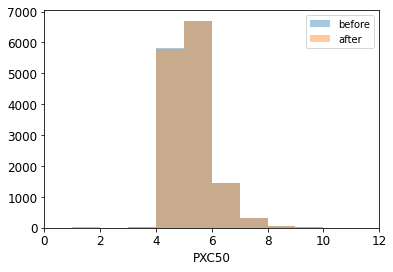

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()

# This will be our before curation
before=data["PXC50"]

# current curated dataframe will not include any out of range values
after=curated_df["PXC50"]

sns.distplot(before, bins=range(0, 12, 1), ax=ax, kde=False, label='before')
sns.distplot(after, bins=range(0, 12, 1), ax=ax, kde=False, label='after')
plt.legend()
ax.set_xlim([0, 12])

Post-processing dataset

Total Number of results = 14364
dataset mean = 5.26211778961296 NM
dataset stdev = 0.6665901682938045 NM
dataset max = 10.66 NM
dataset min = 3.08 NM



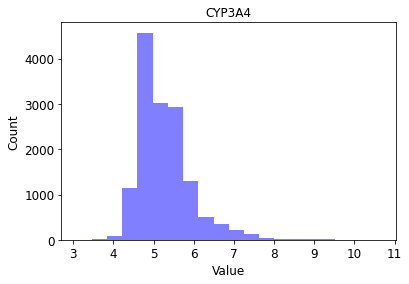

In [ ]:
column = 'PXC50'
num_bins = 20
title = target_name
units = 'NM'
filepath = ""
data=curated_df

curate_data.summarize_data(column, num_bins, title, units, filepath, data)

In [ ]:
!date #ending time

Mon Jan 18 02:55:06 UTC 2021
